<a href="https://colab.research.google.com/github/yashnagrawal/image_classifier_deep_nn_numpy/blob/main/c1w4a_deep_nn_image_classifier_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip W4A2.zip

Archive:  W4A2.zip
   creating: W4A2/
  inflating: __MACOSX/._W4A2         
  inflating: W4A2/.hidden            
  inflating: __MACOSX/W4A2/._.hidden  
  inflating: W4A2/public_tests.py    
  inflating: __MACOSX/W4A2/._public_tests.py  
  inflating: W4A2/test_utils.py      
  inflating: __MACOSX/W4A2/._test_utils.py  
  inflating: W4A2/.DS_Store          
  inflating: __MACOSX/W4A2/._.DS_Store  
  inflating: W4A2/Deep Neural Network - Application.ipynb  
  inflating: __MACOSX/W4A2/._Deep Neural Network - Application.ipynb  
   creating: W4A2/images/
  inflating: __MACOSX/W4A2/._images  
  inflating: W4A2/dnn_app_utils_v3.py  
  inflating: __MACOSX/W4A2/._dnn_app_utils_v3.py  
  inflating: W4A2/.hidden.save       
  inflating: __MACOSX/W4A2/._.hidden.save  
   creating: W4A2/datasets/
  inflating: __MACOSX/W4A2/._datasets  
   creating: W4A2/__pycache__/
  inflating: __MACOSX/W4A2/.___pycache__  
   creating: W4A2/.ipynb_checkpoints/
  inflating: __MACOSX/W4A2/._.ipynb_checkpoints  
  

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math

from dnn_app_utils_v3 import load_data

In [ ]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [ ]:
print("train x: ", train_x_orig.shape)
print("train y: ", train_y.shape)
print("test x: ", test_x_orig.shape)
print("test y:", test_y.shape)
print("classes: ", classes)

train x:  (209, 64, 64, 3)
train y:  (1, 209)
test x:  (50, 64, 64, 3)
test y: (1, 50)
classes:  [b'non-cat' b'cat']


cat
non-cat


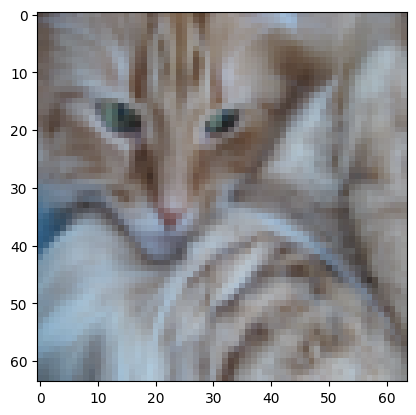

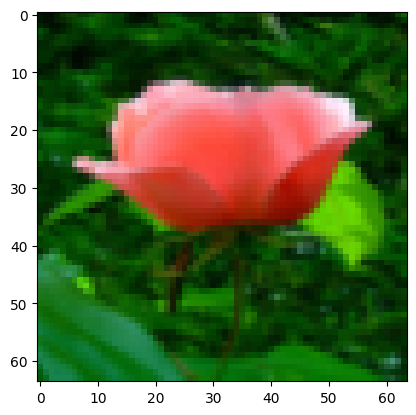

In [ ]:
def show_image(x, y, classes):
  plt.figure()
  print(classes[y].decode("utf-8"))
  plt.imshow(x)

show_image(train_x_orig[2], train_y[0][2], classes)
show_image(train_x_orig[3], train_y[0][3], classes)
plt.show()

In [ ]:
def print_shapes(X, Y):
  print("X: ", X.shape)
  print("Y: ", Y.shape)

In [ ]:
def preprocess_input(X):
  m = X.shape[0]
  new_X = (X.reshape(m, -1).T)
  new_X = new_X/255
  return new_X

print("before precoressing: ")
print_shapes(train_x_orig, train_y)
print_shapes(test_x_orig, test_y)
train_x = preprocess_input(train_x_orig)
test_x = preprocess_input(test_x_orig)
print("after preprocessing: ")
print_shapes(train_x, train_y)
print_shapes(test_x, test_y)


before precoressing: 
X:  (209, 64, 64, 3)
Y:  (1, 209)
X:  (50, 64, 64, 3)
Y:  (1, 50)
after preprocessing: 
X:  (12288, 209)
Y:  (1, 209)
X:  (12288, 50)
Y:  (1, 50)


In [ ]:
def print_params_stats(params):
  for key, value in params.items():
    print(key, value.shape)

In [ ]:
def initialize_parameters(layers_dims):
  np.random.seed(1)
  params = {}
  for i in range(1, len(layers_dims)):
    params["W"+str(i)] = np.random.randn(layers_dims[i], layers_dims[i-1])/np.sqrt(layers_dims[i-1])
    params["b" + str(i)] = np.zeros((layers_dims[i], 1))
  return params

In [ ]:
def relu(Z):
  A = np.maximum(0, Z)
  assert(A.shape == Z.shape)
  return A

In [ ]:
def sigmoid(Z):
  A = 1/(1 + np.exp(-Z))
  # print("Z: ", Z)
  # print("A: ", A)
  assert(A.shape == Z.shape)
  return A

In [ ]:
def linear_forward_prop(W, X, b, activation):
  """
  W: (n{l}, n{l-1})
  X: (n{l-1}, m)
  b: (n{l}, 1)
  activation: "sigmoid" or "relu"
  """
  Z = np.dot(W, X) + b
  A = np.zeros(Z.shape)
  if activation == "sigmoid":
    A = sigmoid(Z)
    # print("forward prop AL (1): ", A)
  else:
    A = relu(Z)


  return A, Z

In [ ]:
def forward_prop(params, x):
  """
  nx: 12288
  m: 209
  x: (nx, m)
  params: {"W1", "b1", "W2", "b2",........}

  Z1 = W1X + b1
  A1 = Relu(Z1)

  Z2 = W2A1 + b2
  A2 = Relu(Z2)
  .....
  ZL = W{L}A{L-1} + bL
  AL = sigmoid(ZL)
  """
  L = len(params)//2
  cache = {}
  A_prev = x
  cache["A0"] = A_prev

  for l in range(1, L):
    A, Z = linear_forward_prop(params["W" + str(l)], A_prev, params["b" + str(l)], "relu")
    cache["Z" + str(l)] = Z
    cache["A" + str(l)] = A
    A_prev = A

  A, Z = linear_forward_prop(params["W" + str(L)], A_prev, params["b" + str(L)], "sigmoid")
  cache["Z" + str(L)] = Z
  cache["A" + str(L)] = A

  # print("forward prop AL (2): ", A)

  return cache, A


In [ ]:
def compute_cost(A, Y):
  """
  m: 209
  A: (1, m)
  Y: (1, m)

  """
  m = Y.shape[1]
  # print("Y: ", Y)
  # print("A: ", A)
  # loss1 = np.sum()
  # loss2 = np.sum()
  # print("loss1: ", loss1)
  # print("loss2: ", loss2)
  sum = float(0)
  # for i in range(m):
  #   y_curr = Y[0][i]
  #   a_curr = A[0][i]
  #   # print(i, end = ": ")
  #   # print(a_curr)
  #   sum = sum + y_curr*math.log(a_curr) + (1-y_curr)*(math.log(1-a_curr))

  sum = np.dot(Y,np.log(A).T) + np.dot((1-Y), (np.log(1-A)).T)
  cost = (1./m) * (-sum)

  cost = float(np.squeeze(cost))     # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
  # assert(cost.shape == ())

  return cost

In [ ]:
def backward_prop(cache, params, X, Y):
  """
  nx: 12288
  m: 209
  X: (nx, m)
  Y: (1, m)

  Z1 = W1X + b1
  A1 = Relu(Z1)

  Z2 = W2A1 + b2
  A2 = Relu(Z2)
  .....
  ZL = W{L}A{L-1} + bL
  AL = sigmoid(ZL)

  """
  m = Y.shape[1]
  L = len(params)//2
  grads = {}
  dZL = cache["A" + str(L)] - Y
  grads["dZ" + str(L)] = dZL
  grads["dW" + str(L)] = (1/m)*np.dot(dZL, cache["A" + str(L-1)].T)
  grads["db" + str(L)] = (1/m)*np.sum(dZL, axis = 1, keepdims = True)
  dA_prev = np.dot((params["W" + str(L)]).T, dZL)
  grads["dA" + str(L-1)] = dA_prev

  for i in range(L-1, 0, -1):
    Z_prev = cache["Z" + str(i)]
    dZ = dA_prev * ((Z_prev>0)*1.0)
    grads["dZ" + str(i)] = dZ
    grads["dW" + str(i)] = (1/m)*np.dot(dZ, cache["A" + str(i-1)].T)
    grads["db" + str(i)] = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot((params["W" + str(i)]).T, dZ)
    grads["dA" + str(i-1)] = dA_prev

  return grads


In [ ]:
def update_params(grads, params, learning_rate):
  """
  grads: {"dW1", "db1", "dW2", "db2".......}
  params: {"W1", "b1", "W2", "b2",........}
  learning_rate: int
  """
  # print(params)
  L = len(params) // 2

  for i in range(1, L+1):
    params["W" + str(i)] = params["W" + str(i)] - learning_rate*grads["dW" + str(i)]
    params["b" + str(i)] = params["b" + str(i)] - learning_rate*grads["db" + str(i)]

  return params

In [ ]:
def model(X, Y, layers_dims, num_iterations = 2500, learning_rate = 0.0075):
  """
  nx: 12288
  m: 209
  X: (nx, m)
  y: (1, m)

  """
  np.random.seed(1)
  L = len(layers_dims) - 1
  params = initialize_parameters(layers_dims)
  sum_cost = 0
  prev_avg = 100
  # print_params_stats(params)

  for i in range(num_iterations):
    cache = {}
    # print("itr: ", i, end = " ")
    # print("b4: ", params["b4"])
    cache, AL = forward_prop(params, X)
    # print(cache.keys())
    # print([val.shape for val in cache.values()])
    # print("Z4: ", cache["Z4"])
    # print("A4: ", cache["A4"])
    cost = compute_cost(AL, Y)
    # print(cost)
    # print(cache.keys())
    grads = backward_prop(cache, params, X, Y)
    # print("params: ", params)
    params = update_params(grads, params, learning_rate)

    sum_cost += cost

    if i%100==0:
      print("itr: ", i, end = " ")
      print("cost: ", cost)

      new_avg = sum_cost / 100

      if(prev_avg < new_avg):
        learning_rate = learning_rate * 0.9
        print("new alpha: ", learning_rate)
        print("prev: ", prev_avg)
        print("new: ", new_avg)
      prev_avg = new_avg
      sum_cost = 0

  return params

In [ ]:
def predict(params, X, Y):
  """
  X: (nx, m)
  params: {"W1", "b1", "W2", "b2",........}
  """
  m = X.shape[1]
  cache, AL = forward_prop(params, X)

  preds = (AL>0.5)*1.0

  accuracy = (np.sum((preds==Y)))/m
  return accuracy

In [ ]:
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model
np.random.seed(1)
params = model(X = train_x, Y = train_y, layers_dims = layers_dims, num_iterations = 2500, learning_rate = 0.01)


itr:  0 cost:  0.7717493284237686
itr:  100 cost:  0.6692696631401116
new alpha:  0.009000000000000001
prev:  0.007717493284237686
new:  0.6804131971375047
itr:  200 cost:  0.6543794549598129
itr:  300 cost:  0.6301393677517347
itr:  400 cost:  0.5706285718713443
itr:  500 cost:  0.4789356172991309
itr:  600 cost:  0.4069071926311317
itr:  700 cost:  0.3652826252002664
itr:  800 cost:  0.28310909345124863
itr:  900 cost:  0.2599361529926321
itr:  1000 cost:  0.19485417699082325
itr:  1100 cost:  0.15957358439778987
itr:  1200 cost:  0.136436179503654
itr:  1300 cost:  0.1184674741327349
itr:  1400 cost:  0.10169340419650613
itr:  1500 cost:  0.0884494331816454
itr:  1600 cost:  0.07847755555409185
itr:  1700 cost:  0.07021667578225281
itr:  1800 cost:  0.0620524536068718
itr:  1900 cost:  0.057440544055342865
itr:  2000 cost:  0.050821738496859226
itr:  2100 cost:  0.045842290766639954
itr:  2200 cost:  0.04147211706259087
itr:  2300 cost:  0.037995304420297034
itr:  2400 cost:  0.0348

In [ ]:
train_acc = predict(params, train_x, train_y)
test_acc = predict(params, test_x, test_y)

print("Training accuracy: ", train_acc)
print("Test accuracy: ", test_acc)

Training accuracy:  1.0
Test accuracy:  0.8
